### Importing necessary libraries

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import time 
import os
import matplotlib.image as mpimg
import cv2

### Checking for GPU/CPU

In [84]:
devices = [ "CPU" , "GPU" ]
for device in devices:
  out = tf.config.list_physical_devices ( device )
  if len ( out ) > 0:
    print ( device , "is available." )
    print ( device )
  else:
    print ( device , "is not available." )

CPU is available.
CPU
GPU is available.
GPU


### Checking the GPU configuration

In [85]:
!nvidia-smi

Mon Jan 25 09:10:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    33W /  70W |    297MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Importing the MNIST data

In [86]:
mnist = tf.keras.datasets.mnist
( X_train_full , y_train_full ) , ( X_test , y_test ) = mnist.load_data ( )

### Checking the size of train and test data

In [87]:
print ( "X_train: {}\ty_train: {}" .format ( X_train_full.shape , y_train_full.shape ) )
print ( "X_test: {} \ty_test: {}" .format ( X_test.shape , y_test.shape ) )

X_train: (60000, 28, 28)	y_train: (60000,)
X_test: (10000, 28, 28) 	y_test: (10000,)


### Normalizing the data

In [88]:
X_train_full , X_test = X_train_full / 255 , X_test / 255

### Indicing the validation data from training data

In [89]:
X_valid , y_valid = X_train_full [ : 5000 ] , y_train_full [ : 5000 ]
X_train , y_train = X_train_full [ 5000 : ] , y_train_full [ 5000 : ]
print ( "Shape of Validation Data:" , X_valid.shape )
print ( "Shape of Training Data:" , X_train.shape )

Shape of Validation Data: (5000, 28, 28)
Shape of Training Data: (55000, 28, 28)


### Visualizing a few samples using Seaborn

Number corresponding to the training sample: 7


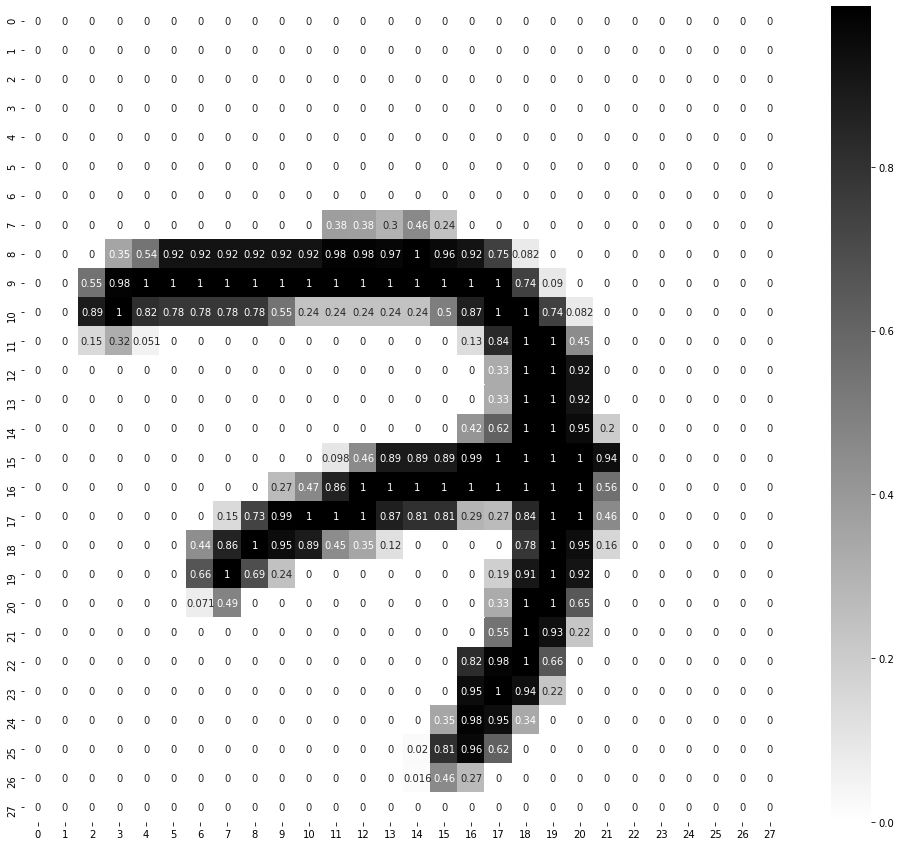

In [90]:
f , ax = plt.subplots ( figsize = ( 17 , 15 ) )
print ( "Number corresponding to the training sample:" , y_train [ 0 ] )
sns.heatmap ( X_train [ 0 ] , cmap = "binary" , annot = True )
plt.show ( )

Number corresponding to the training sample: 3


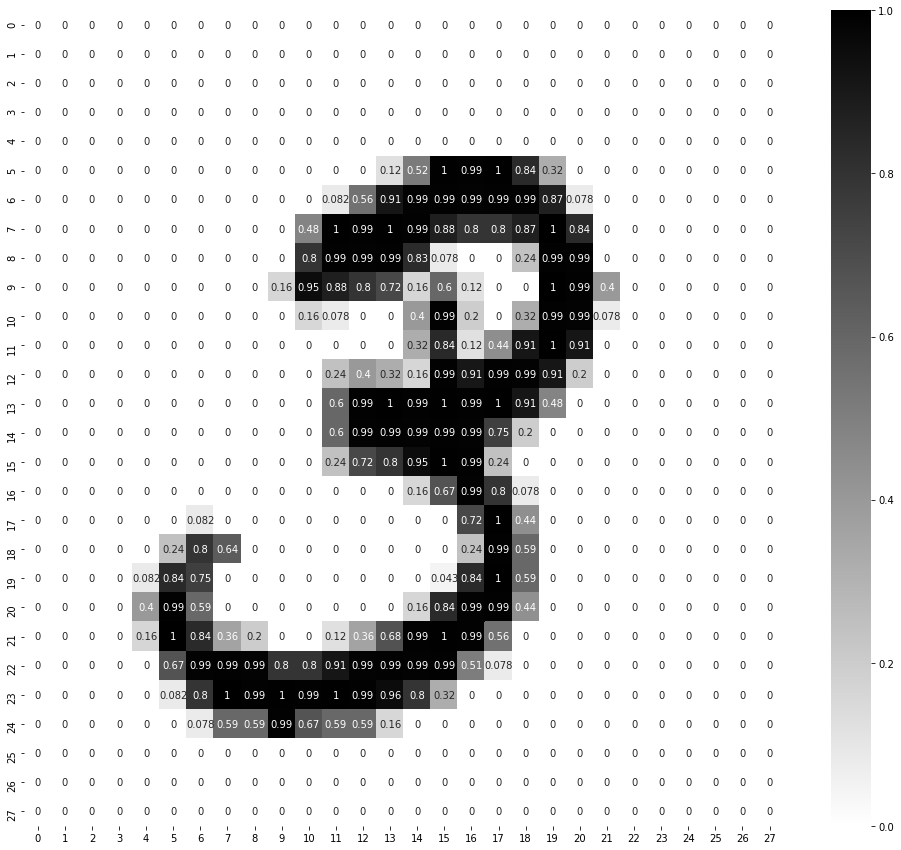

In [91]:
f , ax = plt.subplots ( figsize = ( 17 , 15 ) )
print ( "Number corresponding to the training sample:" , y_train [ 1 ] )
sns.heatmap ( X_train [ 1 ] , cmap = "binary" , annot = True )
plt.show ( )

### Creating an Artificial Neural Network (ANN)

In [92]:
# Creating the layers of neural network
layers = [ tf.keras.layers.Flatten ( input_shape = ( 28 , 28 ) , name = "InputLayer" ) , 
          tf.keras.layers.Dense ( 300 , activation = "relu" , name = "HiddenLayer1" ) , 
          tf.keras.layers.Dense ( 300 , activation = "relu" , name = "HiddenLayer2" ) ,
          tf.keras.layers.Dense ( 300 , activation = "relu" , name = "HiddenLayer3" ) , 
          tf.keras.layers.Dense ( 100 , activation = "relu" , name = "HiddenLayer4" ) , 
          tf.keras.layers.Dense ( 10 , activation = "softmax" , name = "OutputLayer" ) ]
model = tf.keras.Sequential ( layers )

In [93]:
# Model Summary
model.summary ( )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
HiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 300)               90300     
_________________________________________________________________
HiddenLayer3 (Dense)         (None, 300)               90300     
_________________________________________________________________
HiddenLayer4 (Dense)         (None, 100)               30100     
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                1010      
Total params: 447,210
Trainable params: 447,210
Non-trainable params: 0
________________________________________________

In [94]:
# Finding number of parameters
# Number of parameters = First layer * Second layer + bias
print ( "1st Hidden Layer:" , 28 * 28 * 300 + 300 , "parameters" )
print ( "2nd Hidden Layer:" , 300 * 300 + 300 , "parameters" )
print ( "3rd Hidden Layer:" , 300 * 300 + 300 , "parameters" )
print ( "4th Hidden Layer:" , 300 * 100 + 100 , "parameters" )
print ( "Output Layer:" , 100 * 10 + 10 , "parameters" )

1st Hidden Layer: 235500 parameters
2nd Hidden Layer: 90300 parameters
3rd Hidden Layer: 90300 parameters
4th Hidden Layer: 30100 parameters
Output Layer: 1010 parameters


In [95]:
# Initial Weights assigned randomly ( No weight initialization technique has been used )
model.get_weights ( )

[array([[-0.05469975, -0.0009165 , -0.05845455, ...,  0.05877012,
         -0.02818373,  0.02098329],
        [-0.02249547, -0.06259332,  0.00580496, ..., -0.02112715,
         -0.06999279, -0.00813098],
        [-0.02601757, -0.06141335, -0.02244229, ..., -0.01303713,
          0.03795901, -0.03055397],
        ...,
        [ 0.01587258, -0.0323627 , -0.00552731, ...,  0.00396381,
          0.06845297, -0.07008148],
        [-0.01657432,  0.00752574,  0.0339449 , ...,  0.02153037,
         -0.03592795,  0.04620807],
        [ 0.00965375,  0.04457562,  0.04843672, ..., -0.05179242,
          0.02709264,  0.00582114]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [96]:
# Initial random Weights and biases for 1st hidden layer
weights , biases = model.layers [ 1 ].get_weights ( )
print ( "Shape of Weights for 1st Hidden layer:\n" , weights.shape )
print ( "Weights for 1st Hidden layer:\n" , weights )
print ( "Shape of Biases for 1st Hidden layer:\n" , biases.shape )
print ( "Biases for 1st hidden layer:\n" , biases )

Shape of Weights for 1st Hidden layer:
 (784, 300)
Weights for 1st Hidden layer:
 [[-0.05469975 -0.0009165  -0.05845455 ...  0.05877012 -0.02818373
   0.02098329]
 [-0.02249547 -0.06259332  0.00580496 ... -0.02112715 -0.06999279
  -0.00813098]
 [-0.02601757 -0.06141335 -0.02244229 ... -0.01303713  0.03795901
  -0.03055397]
 ...
 [ 0.01587258 -0.0323627  -0.00552731 ...  0.00396381  0.06845297
  -0.07008148]
 [-0.01657432  0.00752574  0.0339449  ...  0.02153037 -0.03592795
   0.04620807]
 [ 0.00965375  0.04457562  0.04843672 ... -0.05179242  0.02709264
   0.00582114]]
Shape of Biases for 1st Hidden layer:
 (300,)
Biases for 1st hidden layer:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [97]:
# Initializing the metrics, optimizer and loss function
model.compile ( metrics = [ "accuracy" ] , optimizer = "SGD" , loss = "sparse_categorical_crossentropy" )

In [98]:
# Fitting the model on training data
history = model.fit ( X_train , y_train , epochs = 30 , validation_data = ( X_valid , y_valid ) )

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.1856 - accuracy: 0.6533 - val_loss: 0.2916 - val_accuracy: 0.9142
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2697 - accuracy: 0.9221 - val_loss: 0.1929 - val_accuracy: 0.9442
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1997 - accuracy: 0.9421 - val_loss: 0.1582 - val_accuracy: 0.9524
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1550 - accuracy: 0.9538 - val_loss: 0.1299 - val_accuracy: 0.9640
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1263 - accuracy: 0.9631 - val_loss: 0.1159 - val_accuracy: 0.9646
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1066 - accuracy: 0.9691 - val_loss: 0.1059 - val_accuracy: 0.9676
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0938 - accuracy: 0.9723 - val_loss: 0.1047 - val_accuracy:

### Visualizing the metrics of training

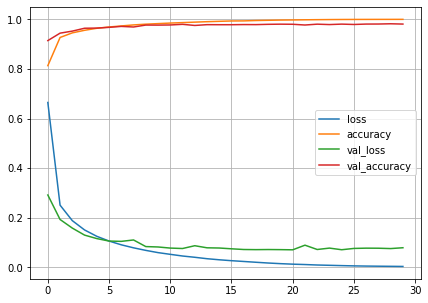

In [99]:
pd.DataFrame ( history.history ).plot ( figsize = ( 7 , 5 ) )
plt.grid ( True )
plt.show ( )

### Saving the model to visualize it using Netron
<a href = "https://github.com/lutzroeder/netron" target = "popup">Download Netron - A tool to visualize Neural Networks</a>

In [100]:
# A custom function to create a folder and save models in reference to timestamps
def SaveModel ( dir = "Saved Models" ):
  os.makedirs ( dir , exist_ok = True )
  filename = time.strftime ( "Model_%d_%m_%Y_%H_%M_%S.h5" )
  model_path = os.path.join ( dir , filename )
  print ( "The model has been saved at" , model_path )
  return model_path

In [101]:
model.save ( SaveModel ( ) )

The model has been saved at Saved Models/Model_25_01_2021_09_12_46.h5


### Evaluation Metrics

In [102]:
print ( model.evaluate ( X_test , y_test ) )
print ( "Test loss:" , model.evaluate ( X_test , y_test ) [ 0 ] )
print ( "Test accuracy:" , model.evaluate ( X_test , y_test ) [ 1 ] )

313/313 [==============================] - 1s 2ms/step - loss: 0.0878 - accuracy: 0.9776
[0.08775791525840759, 0.9775999784469604]
313/313 [==============================] - 1s 2ms/step - loss: 0.0878 - accuracy: 0.9776
Test loss: 0.08775791525840759
313/313 [==============================] - 1s 2ms/step - loss: 0.0878 - accuracy: 0.9776
Test accuracy: 0.9775999784469604


### Predicting the first 5 test samples

Predicted Value: 7
Actual Representation:


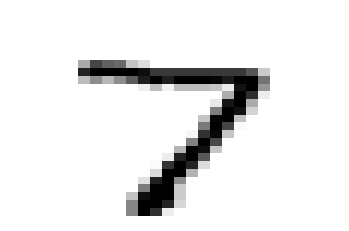

Predicted Value: 2
Actual Representation:


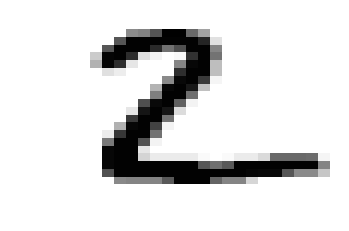

Predicted Value: 1
Actual Representation:


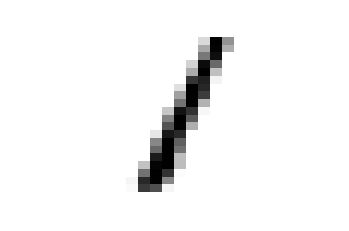

Predicted Value: 0
Actual Representation:


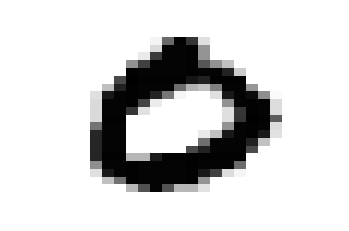

Predicted Value: 4
Actual Representation:


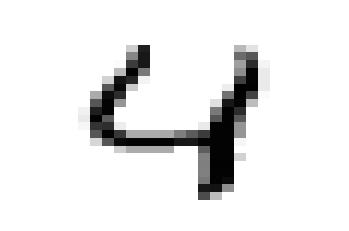

In [103]:
for i in range ( 5 ):
  print ( "Predicted Value:" , model.predict ( X_test [ : 5 ] ).round ( 2 ).argmax ( axis = 1 ) [ i ] )
  print ( "Actual Representation:" )
  sns.heatmap ( X_test [ i ] , cmap = "binary" , cbar = False )
  plt.axis ( "off" )
  plt.show ( )

### Predicting samples taken using snipping tool

Original Image: (438, 428, 4)


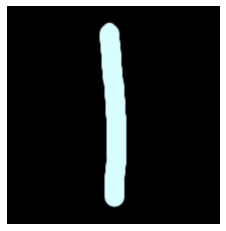

Grayscale Image: (438, 428)


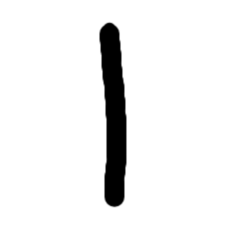

Resized Image: (28, 28)


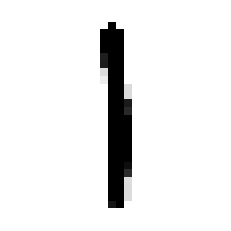

Predicted Value: 1 

Original Image: (436, 422, 4)


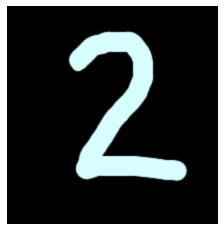

Grayscale Image: (436, 422)


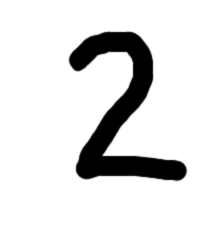

Resized Image: (28, 28)


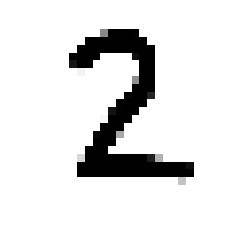

Predicted Value: 2 

Original Image: (436, 430, 4)


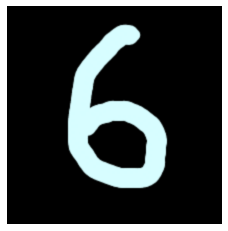

Grayscale Image: (436, 430)


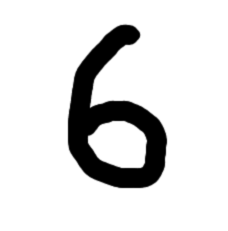

Resized Image: (28, 28)


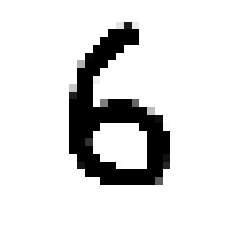

Predicted Value: 6 



In [106]:
# Function for converting RGB values to Grayscale
def RGB2Gray ( rgb ):
  return np.dot ( rgb [ ... , : 3 ] , [ 0.2989 , .5870 , 0.1140 ] )

images = [ "One.png" , "Two.png" , "Six.png" ]
for image in images:
  img = mpimg.imread ( "/content/" + image )
  print ( "Original Image:" , img.shape )
  plt.imshow ( img )
  plt.axis ( "off" )
  plt.show ( )
  gray = RGB2Gray ( img )
  print ( "Grayscale Image:" , gray.shape )
  plt.imshow ( gray , cmap = "binary" )
  plt.axis ( "off" )
  plt.show ( )
  resize_image = cv2.resize ( gray , ( 28 , 28 ) )
  print ( "Resized Image:" , resize_image.shape )
  plt.imshow ( resize_image , cmap = "binary" )
  plt.axis ( "off" )
  plt.show ( )
  print ( "Predicted Value:" , model.predict ( resize_image.reshape ( 1 , 28 , 28 ) ).round ( 2 ).argmax ( ) , "\n" )